In [1]:
#Import Libraries
import pandas as pd
%matplotlib inline
import os
from openbb_terminal.sdk import openbb
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading personal access code in openbb
load_dotenv()
obb_pat = os.getenv("obb_pat")

openbb.login(token = obb_pat)


Using local session to login.

Login successful.

## Pre Covid Analysis from January 1, 2015 to December 31, 2019

In [3]:
# Pre Covid Commodity data
wti = openbb.futures.historical('CL', start_date = '2015-01-01', end_date = '2019-12-31')
brent = openbb.futures.historical('BZ', start_date = '2015-01-01', end_date = '2019-12-31')
natgas = openbb.futures.historical('NG', start_date = '2015-01-01', end_date = '2019-12-31')
gold = openbb.futures.historical('GC', start_date = '2015-01-01', end_date = '2019-12-31')
soybean = openbb.futures.historical('ZL', start_date = '2015-01-01', end_date = '2019-12-31')

wti

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,53.759998,55.110001,52.029999,52.689999,52.689999,268708
2015-01-05,52.610001,52.730000,49.680000,50.040001,50.040001,375782
2015-01-06,50.000000,50.369999,47.549999,47.930000,47.930000,451642
2015-01-07,48.000000,49.310001,46.830002,48.650002,48.650002,460083
2015-01-08,48.779999,49.650002,47.730000,48.790001,48.790001,362081
...,...,...,...,...,...,...
2019-12-23,60.410000,60.770000,60.099998,60.520000,60.520000,314711
2019-12-24,60.630001,61.160000,60.470001,61.110001,61.110001,204535
2019-12-26,61.200001,61.830002,61.060001,61.680000,61.680000,265091


In [4]:
# Extract the 'Adj Close' column from each DataFrame
pre_covid_wti_adj_close = wti['Adj Close']
pre_covid_brent_adj_close = brent['Adj Close']
pre_covid_natgas_adj_close = natgas['Adj Close']
pre_covid_gold_adj_close = gold['Adj Close']
pre_covid_soybean_adj_close = soybean['Adj Close']

# Create a dictionary with Series objects
data = {
    'wti': pre_covid_wti_adj_close,
    'brent': pre_covid_brent_adj_close,
    'natgas': pre_covid_natgas_adj_close,
    'gold': pre_covid_gold_adj_close,
    'soybean': pre_covid_soybean_adj_close
}

# Create a DataFrame by concatenating Series along columns
pre_covid_commodity_data = pd.DataFrame(data)

# Display the merged DataFrame
pre_covid_commodity_data

,wti,brent,natgas,gold,soybean
Date,,,,,
2015-01-02,52.689999,56.419998,3.003,1186.000000,31.950001
2015-01-05,50.040001,53.110001,2.882,1203.900024,32.700001
2015-01-06,47.930000,51.099998,2.938,1219.300049,32.689999
2015-01-07,48.650002,51.150002,2.871,1210.599976,32.980000
2015-01-08,48.790001,50.959999,2.927,1208.400024,33.580002
...,...,...,...,...,...
2019-12-23,60.520000,66.389999,2.214,1482.500000,33.779999
2019-12-24,61.110001,67.199997,2.172,1499.099976,33.880001
2019-12-26,61.680000,67.919998,2.294,1509.300049,34.380001


In [5]:
# Calculate the highest and lowest prices for each commodity
wti_high = round(pre_covid_wti_adj_close.max(), 2)
wti_low = round(pre_covid_wti_adj_close.min(), 2)

brent_high = round(pre_covid_brent_adj_close.max(), 2)
brent_low = round(pre_covid_brent_adj_close.min(), 2)

natgas_high = round(pre_covid_natgas_adj_close.max(), 2)
natgas_low = round(pre_covid_natgas_adj_close.min(), 2)

gold_high = round(pre_covid_gold_adj_close.max(), 2)
gold_low = round(pre_covid_gold_adj_close.min(), 2)

soybean_high = round(pre_covid_soybean_adj_close.max(), 2)
soybean_low = round(pre_covid_soybean_adj_close.min(), 2)

# Display the highest and lowest prices for each commodity
print("WTI - Highest Price:", wti_high, " Lowest Price:", wti_low)
print("Brent - Highest Price:", brent_high, " Lowest Price:", brent_low)
print("NatGas - Highest Price:", natgas_high, " Lowest Price:", natgas_low)
print("Gold - Highest Price:", gold_high, " Lowest Price:", gold_low)
print("Soybean - Highest Price:", soybean_high, " Lowest Price:", soybean_low)

WTI - Highest Price: 76.41  Lowest Price: 26.21
Brent - Highest Price: 86.29  Lowest Price: 27.88
NatGas - Highest Price: 4.84  Lowest Price: 1.64
Gold - Highest Price: 1550.3  Lowest Price: 1050.8
Soybean - Highest Price: 37.72  Lowest Price: 26.05


In [6]:
# Calculate daily returns
pre_covid_returns = pre_covid_commodity_data.pct_change()

# Display the DataFrame with daily returns after dropping NaN values
pre_covid_returns


,wti,brent,natgas,gold,soybean
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.050294,-0.058667,-0.040293,0.015093,0.023474
2015-01-06,-0.042166,-0.037846,0.019431,0.012792,-0.000306
2015-01-07,0.015022,0.000979,-0.022805,-0.007135,0.008871
2015-01-08,0.002878,-0.003715,0.019505,-0.001817,0.018193
...,...,...,...,...,...
2019-12-23,0.001324,0.003780,-0.048969,0.005289,-0.000296
2019-12-24,0.009749,0.012201,-0.018970,0.011197,0.002960
2019-12-26,0.009327,0.010714,0.056169,0.006804,0.014758


<Axes: title={'left': 'Daily Returns'}, xlabel='Date'>

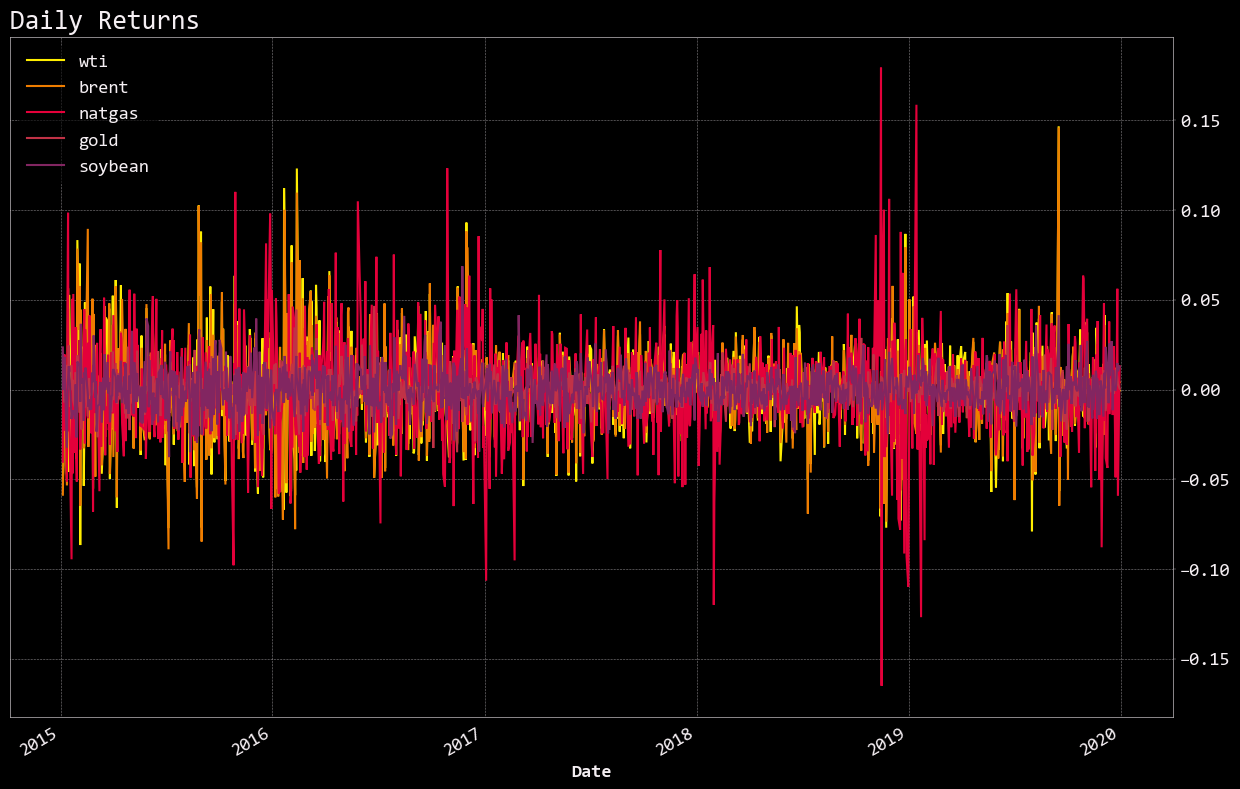

In [7]:
# Plot daily returns of all commodities
pre_covid_returns.plot(figsize=(15, 10), title="Daily Returns")

<Axes: title={'left': 'Cumulative Returns'}, xlabel='Date'>

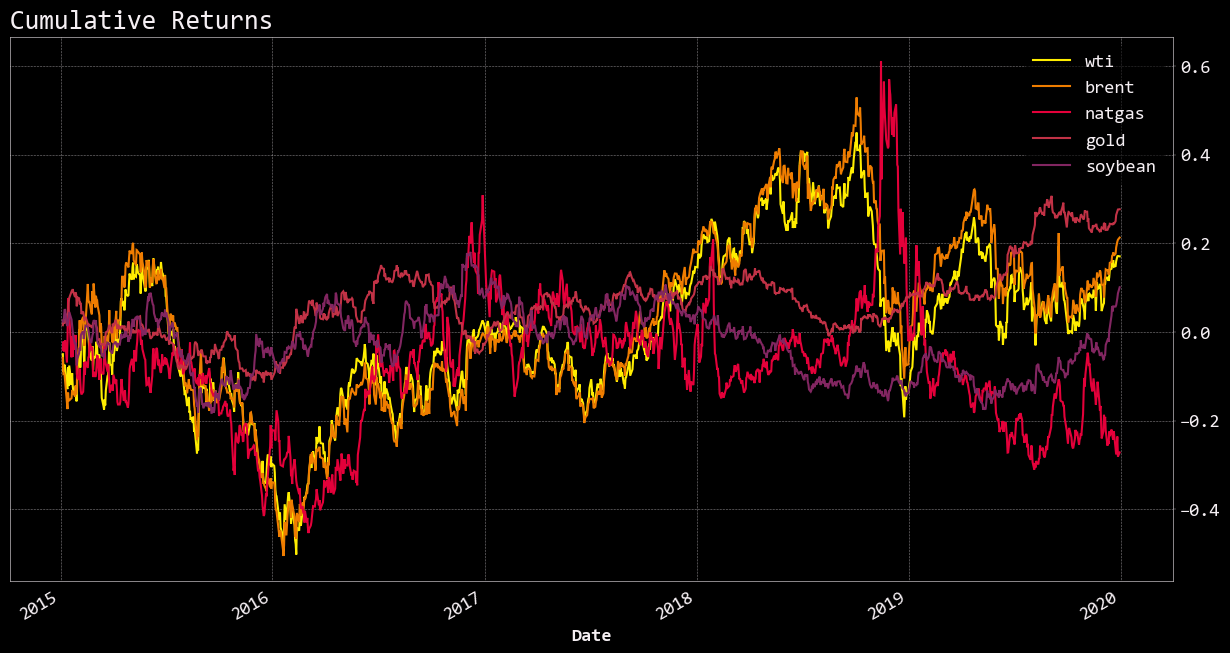

In [8]:
# Calculate cumulative returns of all portfolios
pre_covid_cumulative_returns = (1 + pre_covid_returns).cumprod() - 1

# Plot cumulative returns
pre_covid_cumulative_returns.plot(figsize=(15, 8), title="Cumulative Returns")

Text(0.0, 1.0, 'Box Plots of Pre Covid Returns')

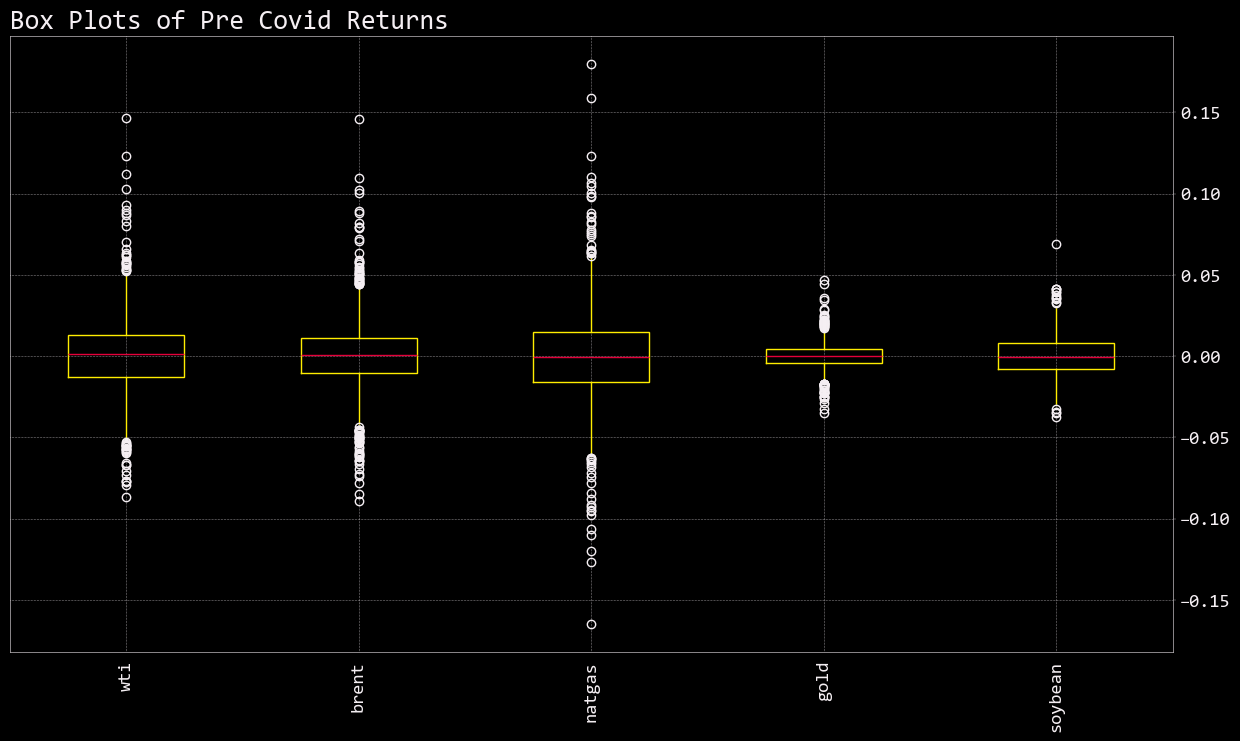

In [9]:
# Box plot to visually show risk
pre_covid_returns.boxplot(figsize=(15, 8), vert=True,rot = 90)

plt.title("Box Plots of Pre Covid Returns")

In [10]:
# Calculate the daily standard deviations of commodities
pre_covid_std_dev = pre_covid_returns.std()
print(pre_covid_std_dev)

wti        0.023962
brent      0.022633
natgas     0.028737
gold       0.008135
soybean    0.011730
dtype: float64


In [11]:
# Calculate the annualized standard deviation (252 trading days)
pre_covid_annulized_std = pre_covid_std_dev * np.sqrt(252)
pre_covid_annulized_std

wti        0.380385
brent      0.359287
natgas     0.456189
gold       0.129131
soybean    0.186216
dtype: float64

<Axes: title={'left': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

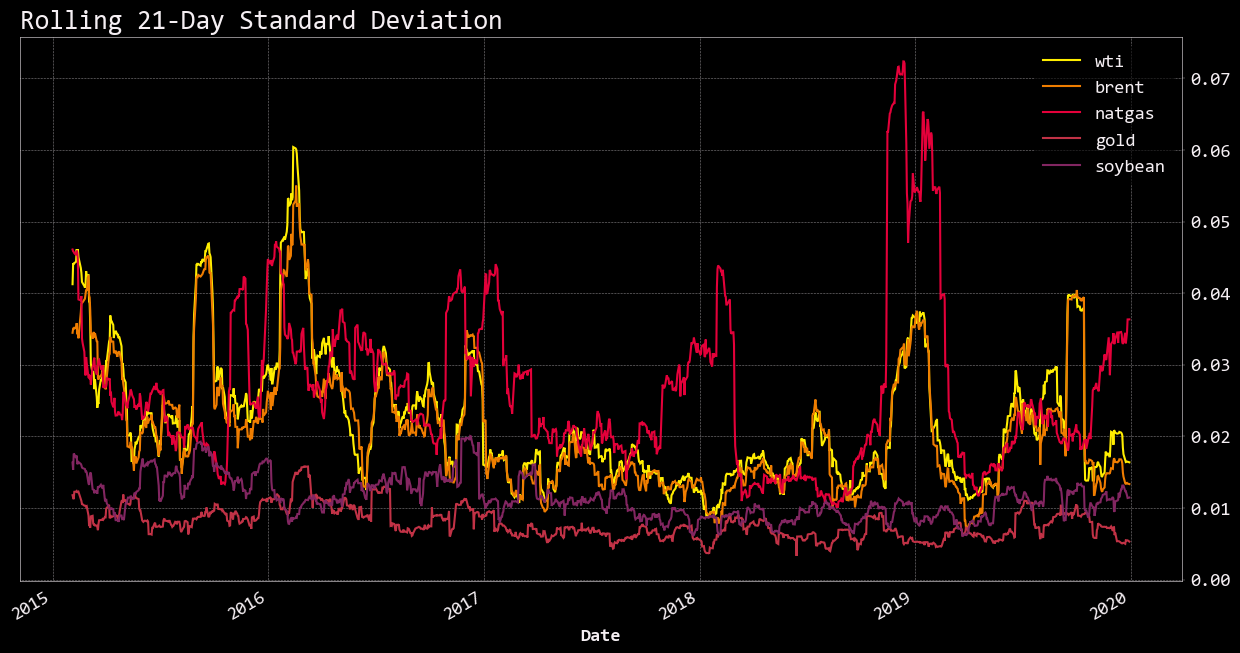

In [12]:
# Calculate the rolling standard deviation for all commodites using a 21-day window
pre_covid_rolling_std = pre_covid_returns.rolling(window=21).std()
# Plot the rolling standard deviation
pre_covid_rolling_std.plot(figsize=(15,8),title="Rolling 21-Day Standard Deviation")

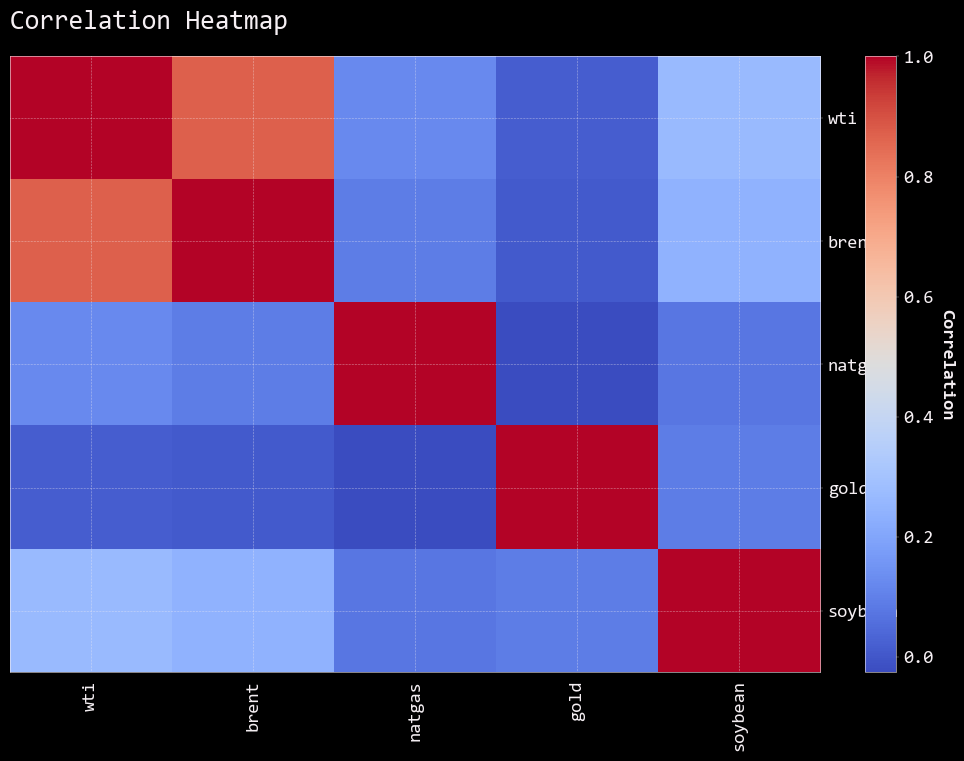

In [13]:
# Calculate the correlation matrix
correlation = pre_covid_returns.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))

# Add some space to the left of the heatmap
plt.subplots_adjust(left=0.15)

# Plot the heatmap
heatmap = plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')

# Set axis labels and ticks
tick_labels = correlation.columns
plt.xticks(range(len(correlation)), tick_labels, rotation=90)
plt.yticks(range(len(correlation)), tick_labels)

# Add title
plt.title('Correlation Heatmap', pad=20)

# Add colorbar to the right
cbar = plt.colorbar(heatmap, fraction=0.05, pad=0.05)
cbar.set_label('Correlation', rotation=270, labelpad=15)

# Display the plot
plt.show()


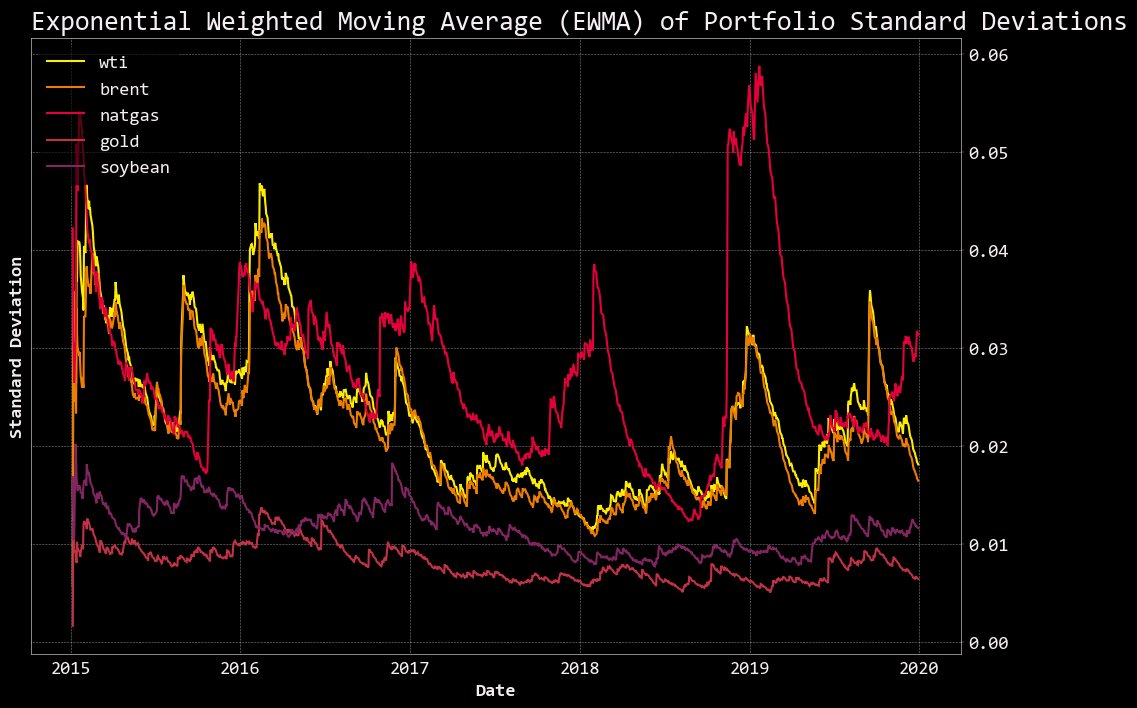

In [14]:
# Calculate the 21-day rolling window with exponentially weighted moving average for each portfolio's standard deviation
pre_covid_rolling_std_ewm = pre_covid_returns.ewm(halflife=21).std()

# Plot the results
plt.figure(figsize=(12, 8))
for column in pre_covid_rolling_std_ewm.columns:
    plt.plot(pre_covid_rolling_std_ewm.index, pre_covid_rolling_std_ewm[column], label=column)

plt.title('Exponential Weighted Moving Average (EWMA) of Portfolio Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()

In [15]:
# Annualized Sharpe Ratios
pre_covid_sharpe_ratios = (pre_covid_returns.mean() * 252) / (pre_covid_returns.std() * np.sqrt(252))

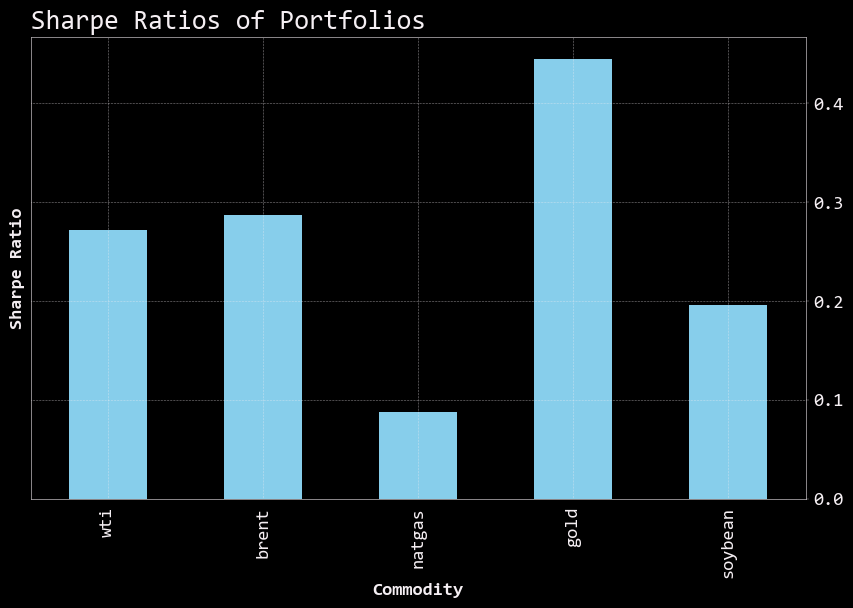

In [16]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
pre_covid_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Commodity')
plt.ylabel('Sharpe Ratio')
plt.show()

## Covid Analysis from January 1, 2020 to December 31, 2021

In [17]:
# Covid Commodity data
wti = openbb.futures.historical('CL', start_date = '2020-01-01', end_date = '2021-12-31')
brent = openbb.futures.historical('BZ', start_date = '2020-01-01', end_date = '2021-12-31')
natgas = openbb.futures.historical('NG', start_date = '2020-01-01', end_date = '2021-12-31')
gold = openbb.futures.historical('GC', start_date = '2020-01-01', end_date = '2021-12-31')
soybean = openbb.futures.historical('ZL', start_date = '2020-01-01', end_date = '2021-12-31')

wti

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,61.599998,61.599998,60.639999,61.180000,61.180000,486873
2020-01-03,61.180000,64.089996,61.130001,63.049999,63.049999,885861
2020-01-06,63.709999,64.720001,62.639999,63.270000,63.270000,724236
2020-01-07,62.910000,63.150002,62.110001,62.700001,62.700001,582649
2020-01-08,62.840000,65.650002,59.150002,59.610001,59.610001,1205710
...,...,...,...,...,...,...
2021-12-23,73.029999,73.949997,72.269997,73.790001,73.790001,270223
2021-12-27,73.379997,76.089996,72.570000,75.570000,75.570000,268490
2021-12-28,75.970001,76.919998,75.529999,75.980003,75.980003,249728


In [18]:
# Extract the 'Adj Close' column from each DataFrame
covid_wti_adj_close = wti['Adj Close']
covid_brent_adj_close = brent['Adj Close']
covid_natgas_adj_close = natgas['Adj Close']
covid_gold_adj_close = gold['Adj Close']
covid_soybean_adj_close = soybean['Adj Close']

# Create a dictionary with Series objects
data = {
    'wti': covid_wti_adj_close,
    'brent': covid_brent_adj_close,
    'natgas': covid_natgas_adj_close,
    'gold': covid_gold_adj_close,
    'soybean': covid_soybean_adj_close
}
 
# Create a DataFrame by concatenating Series along columns
covid_commodity_data = pd.DataFrame(data)
 
# Display the merged DataFrame
covid_commodity_data

,wti,brent,natgas,gold,soybean
Date,,,,,
2020-01-02,61.180000,66.250000,2.122,1524.500000,34.970001
2020-01-03,63.049999,68.599998,2.130,1549.199951,34.810001
2020-01-06,63.270000,68.910004,2.135,1566.199951,34.240002
2020-01-07,62.700001,68.269997,2.162,1571.800049,34.459999
2020-01-08,59.610001,65.440002,2.141,1557.400024,34.270000
...,...,...,...,...,...
2021-12-23,73.790001,76.849998,3.731,1811.199951,55.439999
2021-12-27,75.570000,78.599998,4.060,1808.099976,56.720001
2021-12-28,75.980003,78.940002,4.055,1810.199951,56.549999


In [19]:
# Calculate the highest and lowest prices for each commodity
wti_high = round(covid_wti_adj_close.max(), 2)
wti_low = round(covid_wti_adj_close.min(), 2)
 
brent_high = round(covid_brent_adj_close.max(), 2)
brent_low = round(covid_brent_adj_close.min(), 2)
 
natgas_high = round(covid_natgas_adj_close.max(), 2)
natgas_low = round(covid_natgas_adj_close.min(), 2)
 
gold_high = round(covid_gold_adj_close.max(), 2)
gold_low = round(covid_gold_adj_close.min(), 2)
 
soybean_high = round(covid_soybean_adj_close.max(), 2)
soybean_low = round(covid_soybean_adj_close.min(), 2)
 
# Display the highest and lowest prices for each commodity
print("WTI - Highest Price:", wti_high, " Lowest Price:", wti_low)
print("Brent - Highest Price:", brent_high, " Lowest Price:", brent_low)
print("NatGas - Highest Price:", natgas_high, " Lowest Price:", natgas_low)
print("Gold - Highest Price:", gold_high, " Lowest Price:", gold_low)
print("Soybean - Highest Price:", soybean_high, " Lowest Price:", soybean_low)

WTI - Highest Price: 84.65  Lowest Price: -37.63
Brent - Highest Price: 86.4  Lowest Price: 19.33
NatGas - Highest Price: 6.31  Lowest Price: 1.48
Gold - Highest Price: 2051.5  Lowest Price: 1477.3
Soybean - Highest Price: 72.08  Lowest Price: 24.99


<Axes: title={'left': 'Daily Returns'}, xlabel='Date'>

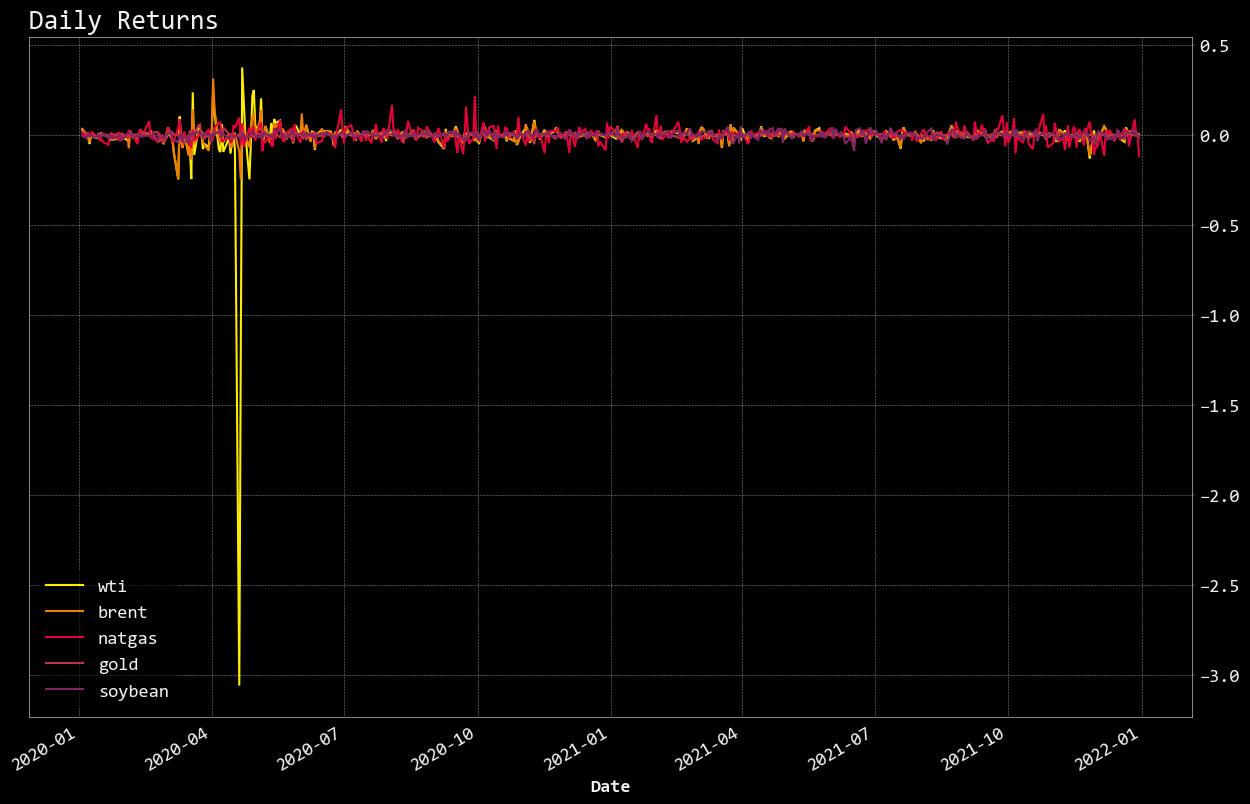

In [21]:
# Calculate daily returns
covid_returns = covid_commodity_data.pct_change()
 
# Display the DataFrame with daily returns after dropping NaN values
covid_returns
 

# Plot daily returns of all commodities
covid_returns.plot(figsize=(15, 10), title="Daily Returns")

<Axes: title={'left': 'Cumulative Returns'}, xlabel='Date'>

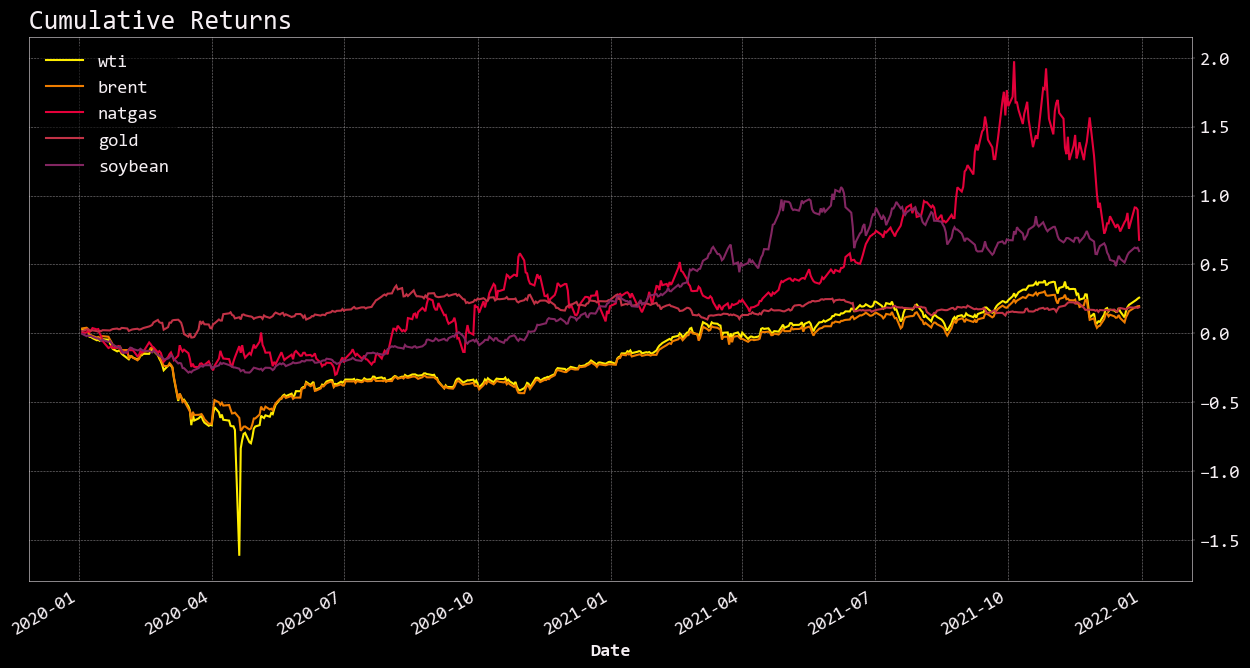

In [22]:
# Calculate cumulative returns of all portfolios
covid_cumulative_returns = (1 + covid_returns).cumprod() - 1
 
# Plot cumulative returns
covid_cumulative_returns.plot(figsize=(15, 8), title="Cumulative Returns")

Text(0.0, 1.0, 'Box Plots of Pre Covid Returns')

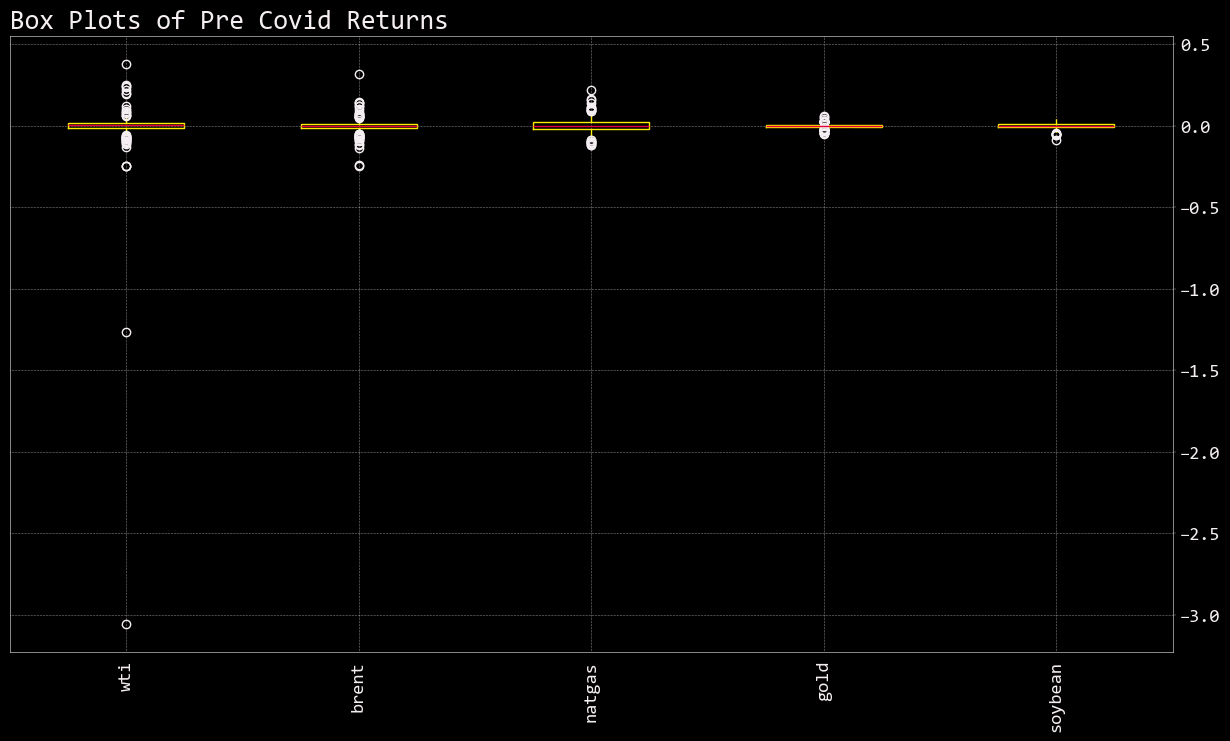

In [23]:
# Box plot to visually show risk
covid_returns.boxplot(figsize=(15, 8), vert=True,rot = 90)
 
plt.title("Box Plots of Pre Covid Returns")

In [24]:
# Calculate the daily standard deviations of commodities
covid_std_dev = covid_returns.std()
print(covid_std_dev)

wti        0.154456
brent      0.035846
natgas     0.039474
gold       0.011655
soybean    0.018266
dtype: float64


In [25]:
# Calculate the annualized standard deviation (252 trading days)
covid_annulized_std = covid_std_dev * np.sqrt(252)
covid_annulized_std

wti        2.451918
brent      0.569034
natgas     0.626633
gold       0.185015
soybean    0.289965
dtype: float64

<Axes: title={'left': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

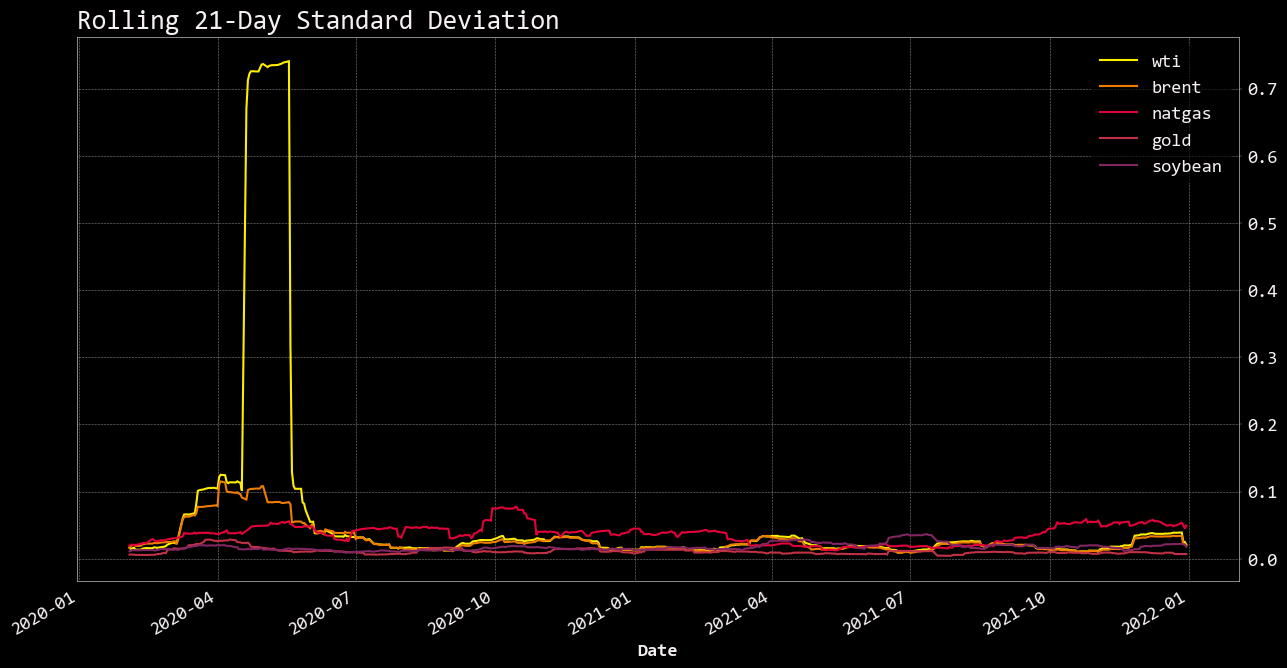

In [26]:
# Calculate the rolling standard deviation for all commodities using a 21-day window
covid_rolling_std = covid_returns.rolling(window=21).std()
# Plot the rolling standard deviation
covid_rolling_std.plot(figsize=(15,8),title="Rolling 21-Day Standard Deviation")

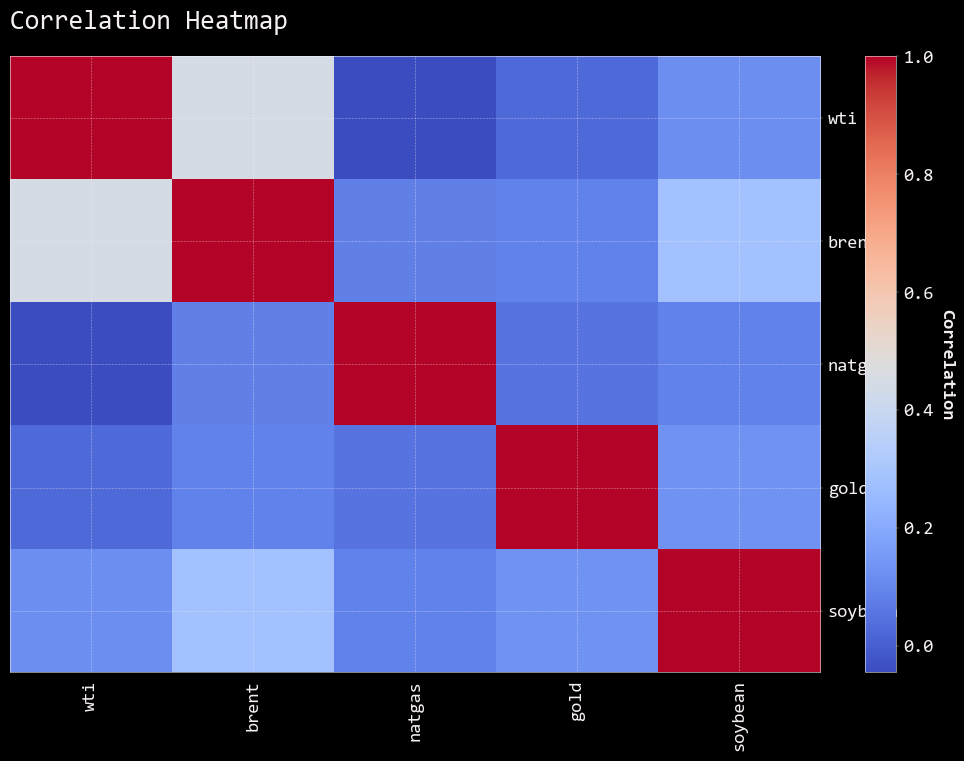

In [27]:
# Calculate the correlation matrix
correlation = covid_returns.corr()
 
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
 
# Add some space to the left of the heatmap
plt.subplots_adjust(left=0.15)
 
# Plot the heatmap
heatmap = plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')
 
# Set axis labels and ticks
tick_labels = correlation.columns
plt.xticks(range(len(correlation)), tick_labels, rotation=90)
plt.yticks(range(len(correlation)), tick_labels)
 
# Add title
plt.title('Correlation Heatmap', pad=20)
 
# Add colorbar to the right
cbar = plt.colorbar(heatmap, fraction=0.05, pad=0.05)
cbar.set_label('Correlation', rotation=270, labelpad=15)
 
# Display the plot
plt.show()

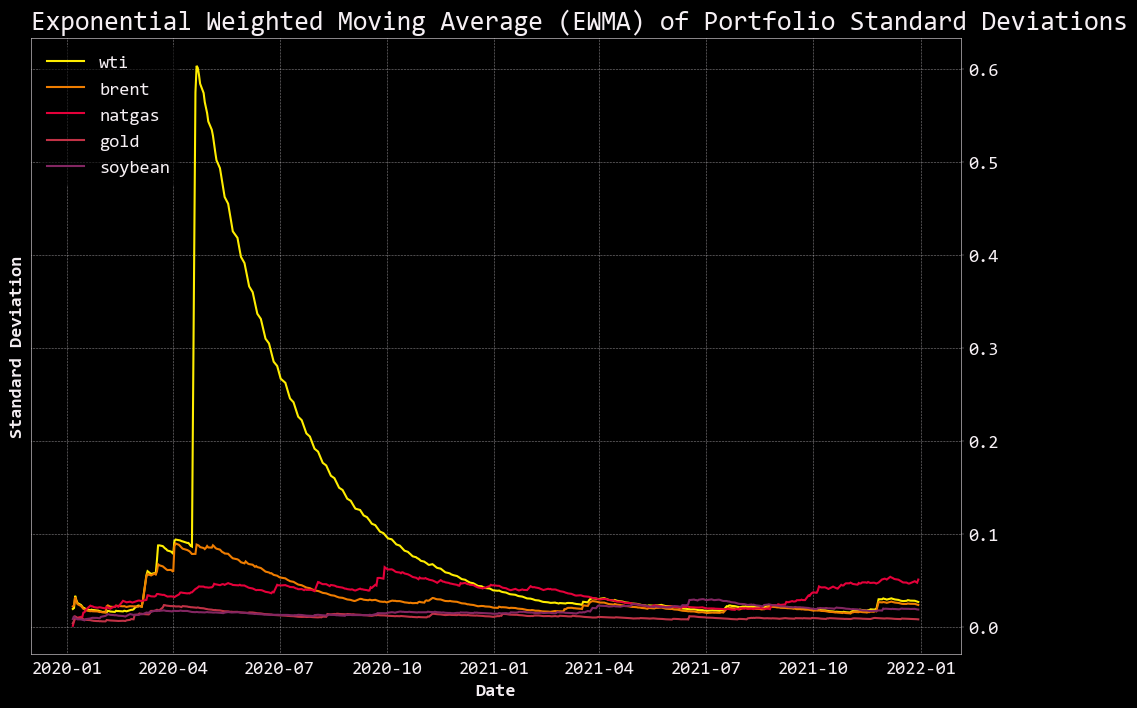

In [28]:
# Calculate the 21-day rolling window with exponentially weighted moving average for each portfolio's standard deviation
covid_rolling_std_ewm = covid_returns.ewm(halflife=21).std()
 
# Plot the results
plt.figure(figsize=(12, 8))
for column in covid_rolling_std_ewm.columns:
    plt.plot(covid_rolling_std_ewm.index, covid_rolling_std_ewm[column], label=column)
 
plt.title('Exponential Weighted Moving Average (EWMA) of Portfolio Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()

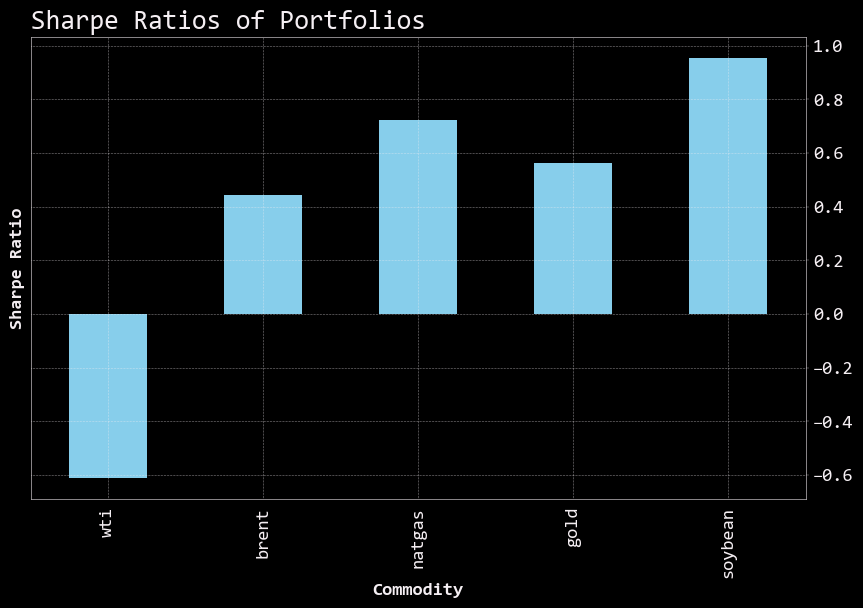

In [29]:
# Annualized Sharpe Ratios
covid_sharpe_ratios = (covid_returns.mean() * 252) / (covid_returns.std() * np.sqrt(252))
 

# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
covid_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Commodity')
plt.ylabel('Sharpe Ratio')
plt.show()

## Post Covid Analysis from January 1, 2022 to September 30, 2023

In [30]:
# Post Covid Commodity data

wti = openbb.futures.historical('CL', start_date = '2022-01-01', end_date = '2023-09-30')
brent = openbb.futures.historical('BZ', start_date = '2022-01-01', end_date = '2023-09-30')
natgas = openbb.futures.historical('NG', start_date = '2022-01-01', end_date = '2023-09-30')
gold = openbb.futures.historical('GC', start_date = '2022-01-01', end_date = '2023-09-30')
soybean = openbb.futures.historical('ZL', start_date = '2022-01-01', end_date = '2023-09-30')

wti

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,76.080002,317628
2022-01-04,76.019997,77.639999,75.699997,76.989998,76.989998,372848
2022-01-05,77.180000,78.580002,76.510002,77.849998,77.849998,397898
2022-01-06,77.239998,80.239998,76.730003,79.459999,79.459999,476665
2022-01-07,79.620003,80.470001,78.519997,78.900002,78.900002,414434
...,...,...,...,...,...,...
2023-09-25,90.550003,90.830002,89.029999,89.680000,89.680000,328369
2023-09-26,89.879997,90.739998,88.190002,90.389999,90.389999,318016
2023-09-27,90.529999,94.169998,90.400002,93.680000,93.680000,504630


In [31]:
# Extract the 'Adj Close' column from each DataFrame
post_covid_wti_adj_close = wti['Adj Close']
post_covid_brent_adj_close = brent['Adj Close']
post_covid_natgas_adj_close = natgas['Adj Close']
post_covid_gold_adj_close = gold['Adj Close']
post_covid_soybean_adj_close = soybean['Adj Close']
 
# Create a dictionary with Series objects
data = {
    'wti': post_covid_wti_adj_close,
    'brent': post_covid_brent_adj_close,
    'natgas': post_covid_natgas_adj_close,
    'gold': post_covid_gold_adj_close,
    'soybean': post_covid_soybean_adj_close
}
 
# Create a DataFrame by concatenating Series along columns
post_covid_commodity_data = pd.DataFrame(data)
 
# Display the merged DataFrame
post_covid_commodity_data

,wti,brent,natgas,gold,soybean
Date,,,,,
2022-01-03,76.080002,78.980003,3.815,1799.400024,56.209999
2022-01-04,76.989998,80.000000,3.717,1814.000000,58.139999
2022-01-05,77.849998,80.800003,3.882,1824.599976,59.320000
2022-01-06,79.459999,81.989998,3.812,1788.699951,58.779999
2022-01-07,78.900002,81.750000,3.916,1797.000000,58.630001
...,...,...,...,...,...
2023-09-25,89.680000,93.290001,2.639,1916.599976,58.750000
2023-09-26,90.389999,93.959999,2.656,1900.400024,58.860001
2023-09-27,93.680000,96.550003,2.764,1871.599976,59.610001


In [32]:
# Calculate the highest and lowest prices for each commodity
wti_high = round(post_covid_wti_adj_close.max(), 2)
wti_low = round(post_covid_wti_adj_close.min(), 2)
 
brent_high = round(post_covid_brent_adj_close.max(), 2)
brent_low = round(post_covid_brent_adj_close.min(), 2)
 
natgas_high = round(post_covid_natgas_adj_close.max(), 2)
natgas_low = round(post_covid_natgas_adj_close.min(), 2)
 
gold_high = round(post_covid_gold_adj_close.max(), 2)
gold_low = round(post_covid_gold_adj_close.min(), 2)
 
soybean_high = round(post_covid_soybean_adj_close.max(), 2)
soybean_low = round(post_covid_soybean_adj_close.min(), 2)
 
# Display the highest and lowest prices for each commodity
print("WTI - Highest Price:", wti_high, " Lowest Price:", wti_low)
print("Brent - Highest Price:", brent_high, " Lowest Price:", brent_low)
print("NatGas - Highest Price:", natgas_high, " Lowest Price:", natgas_low)
print("Gold - Highest Price:", gold_high, " Lowest Price:", gold_low)
print("Soybean - Highest Price:", soybean_high, " Lowest Price:", soybean_low)
 

WTI - Highest Price: 123.7  Lowest Price: 66.74
Brent - Highest Price: 127.98  Lowest Price: 71.84
NatGas - Highest Price: 9.68  Lowest Price: 1.99
Gold - Highest Price: 2048.0  Lowest Price: 1623.3
Soybean - Highest Price: 90.6  Lowest Price: 46.2


<Axes: title={'left': 'Daily Returns'}, xlabel='Date'>

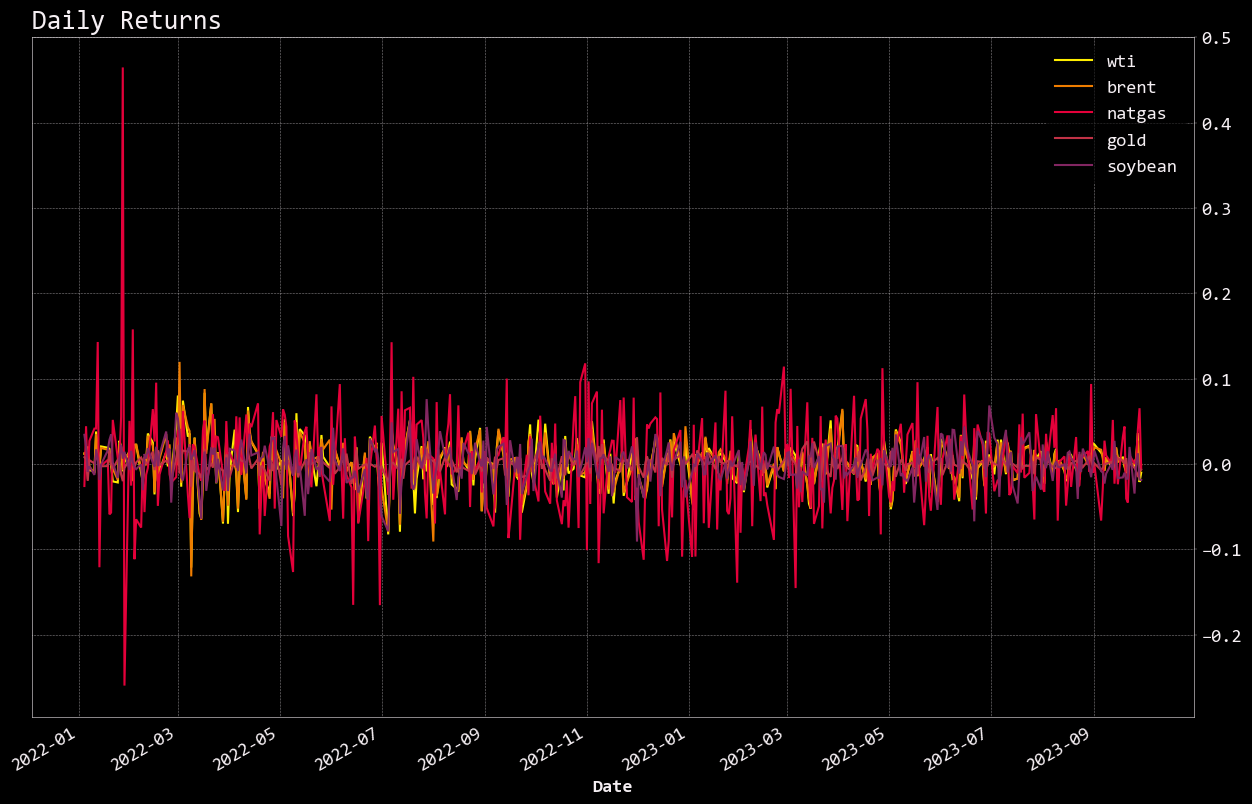

In [34]:
# Calculate daily returns
post_covid_returns = post_covid_commodity_data.pct_change()
 
# Display the DataFrame with daily returns after dropping NaN values
post_covid_returns

# Plot daily returns of all commodities
post_covid_returns.plot(figsize=(15, 10), title="Daily Returns")

<Axes: title={'left': 'Cumulative Returns'}, xlabel='Date'>

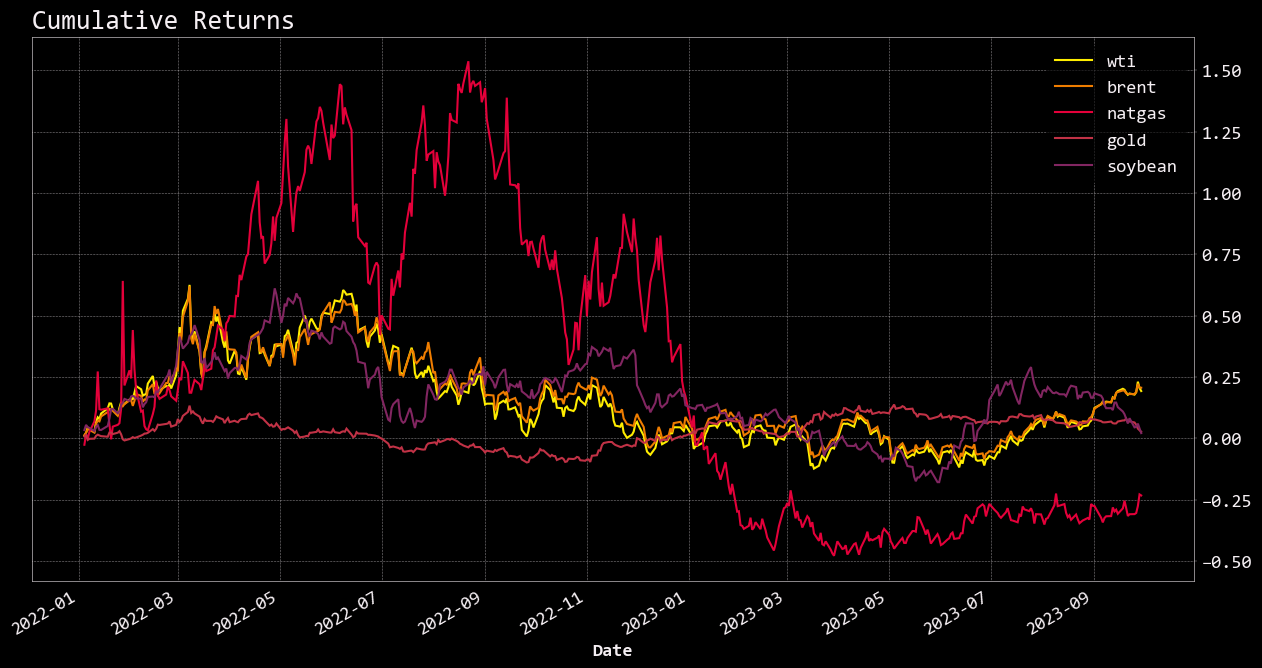

In [35]:
# Calculate cumulative returns of all portfolios
post_covid_cumulative_returns = (1 + post_covid_returns).cumprod() - 1
 
# Plot cumulative returns
post_covid_cumulative_returns.plot(figsize=(15, 8), title="Cumulative Returns")

Text(0.0, 1.0, 'Box Plots of Post Covid Returns')

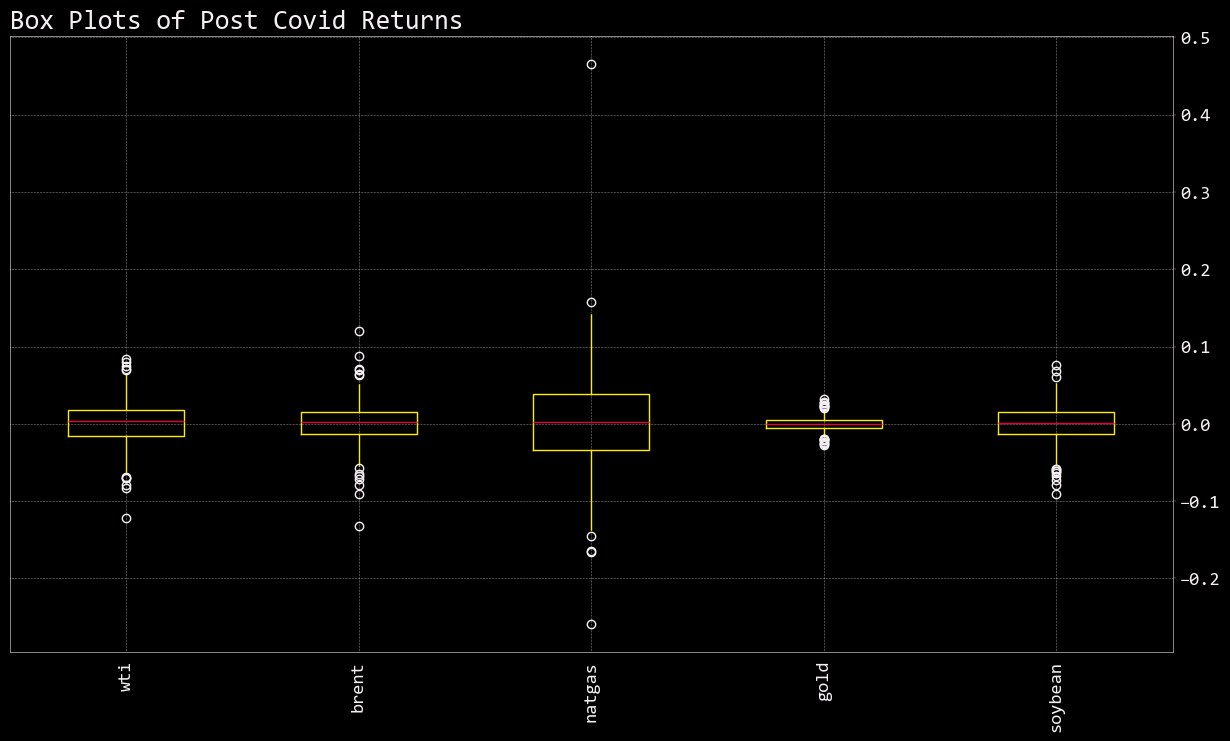

In [36]:
# Box plot to visually show risk
post_covid_returns.boxplot(figsize=(15, 8), vert=True,rot = 90)
 
plt.title("Box Plots of Post Covid Returns")

In [37]:
# Calculate the daily standard deviations of commodities
post_covid_std_dev = post_covid_returns.std()
print(post_covid_std_dev)

wti        0.026551
brent      0.025403
natgas     0.057066
gold       0.009083
soybean    0.022828
dtype: float64


In [38]:
# Calculate the annualized standard deviation (252 trading days)
post_covid_annulized_std = post_covid_std_dev * np.sqrt(252)
post_covid_annulized_std

wti        0.421477
brent      0.403252
natgas     0.905898
gold       0.144183
soybean    0.362389
dtype: float64

<Axes: title={'left': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

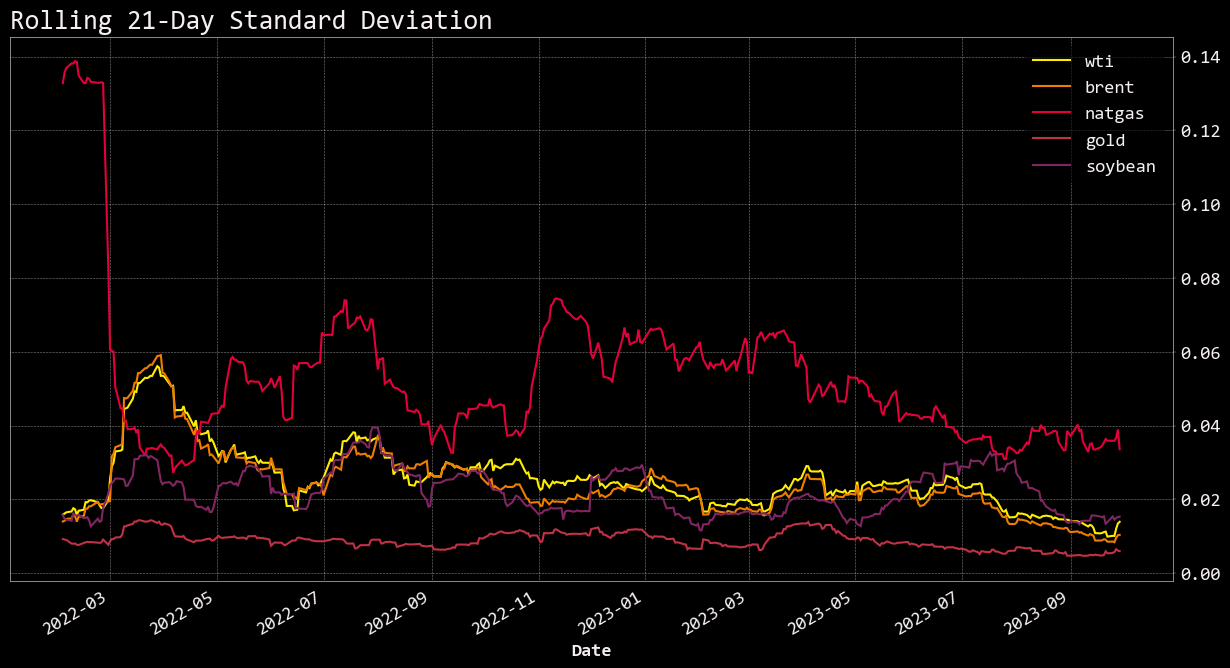

In [39]:
# Calculate the rolling standard deviation for all commodities using a 21-day window
post_covid_rolling_std = post_covid_returns.rolling(window=21).std()
# Plot the rolling standard deviation
post_covid_rolling_std.plot(figsize=(15,8),title="Rolling 21-Day Standard Deviation")

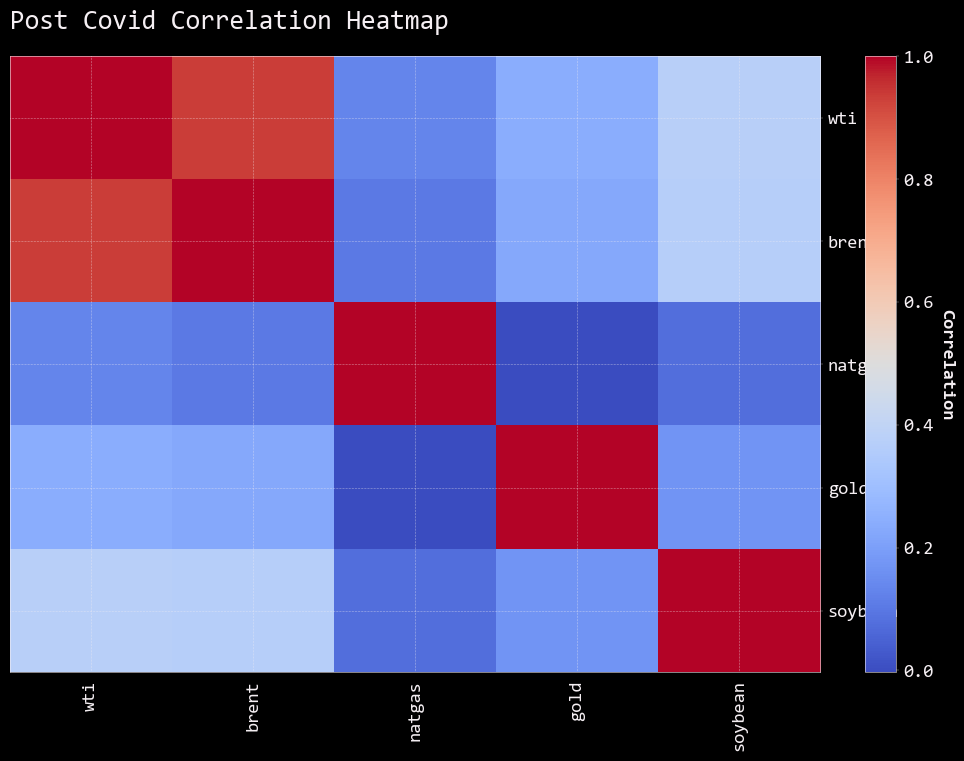

In [40]:
# Calculate the correlation matrix
correlation = post_covid_returns.corr()
 
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
 
# Add some space to the left of the heatmap
plt.subplots_adjust(left=0.15)
 
# Plot the heatmap
heatmap = plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')
 
# Set axis labels and ticks
tick_labels = correlation.columns
plt.xticks(range(len(correlation)), tick_labels, rotation=90)
plt.yticks(range(len(correlation)), tick_labels)
 
# Add title
plt.title('Post Covid Correlation Heatmap', pad=20)
 
# Add colorbar to the right
cbar = plt.colorbar(heatmap, fraction=0.05, pad=0.05)
cbar.set_label('Correlation', rotation=270, labelpad=15)
 
# Display the plot
plt.show()

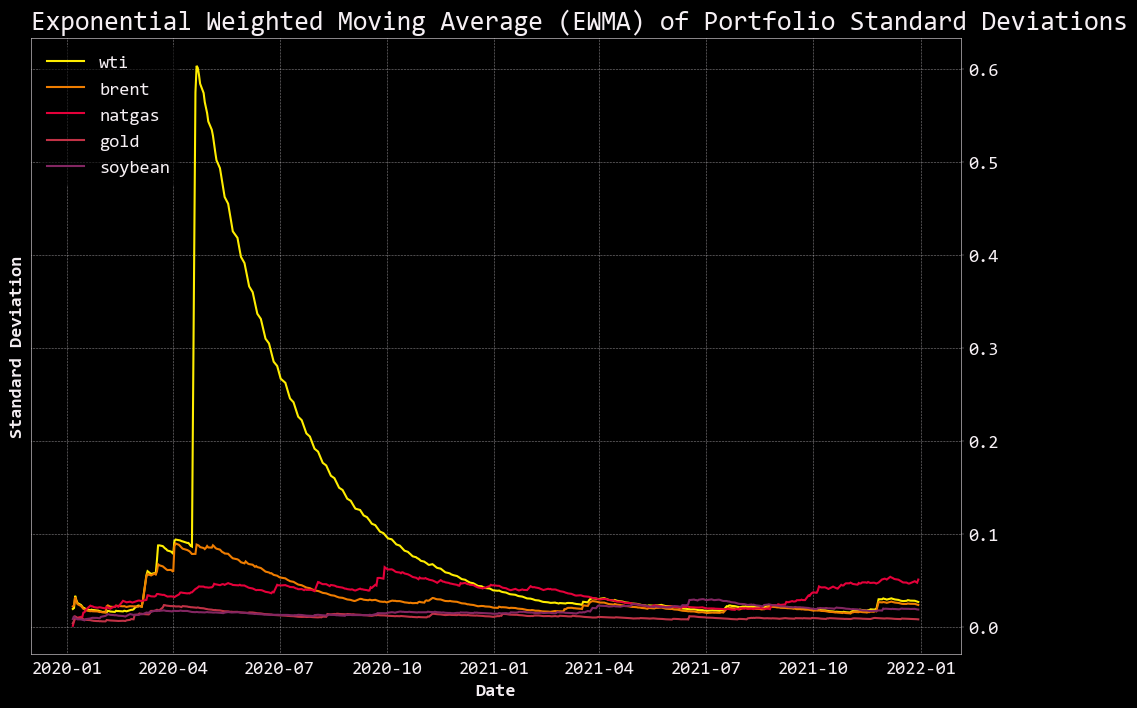

In [41]:
# Calculate the 21-day rolling window with exponentially weighted moving average for each portfolio's standard deviation
post_covid_rolling_std_ewm = covid_returns.ewm(halflife=21).std()
 
# Plot the results
plt.figure(figsize=(12, 8))
for column in covid_rolling_std_ewm.columns:
    plt.plot(covid_rolling_std_ewm.index, covid_rolling_std_ewm[column], label=column)
 
plt.title('Exponential Weighted Moving Average (EWMA) of Portfolio Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()

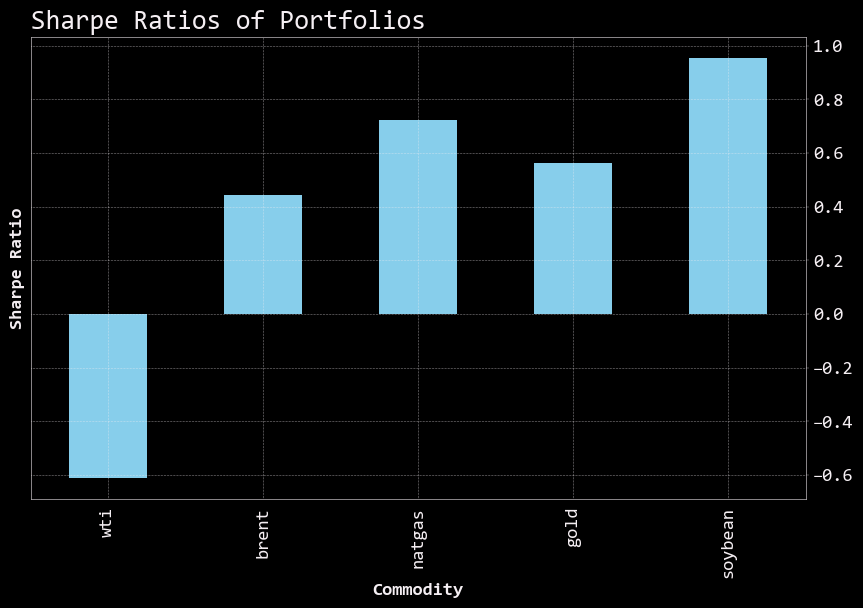

In [42]:
# Annualized Sharpe Ratios
post_covid_sharpe_ratios = (covid_returns.mean() * 252) / (covid_returns.std() * np.sqrt(252))
 

# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
post_covid_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Commodity')
plt.ylabel('Sharpe Ratio')
plt.show()